# Assignment 1

## Importing necessary libraries and Development Dataset

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model

warnings.filterwarnings('ignore')

fcc_dev = pd.read_csv('Development Dataset - With Actuals.csv')
fcc_dev.head()

,Instrument,Instrument Type,Instrument Subtype,Counterparty Alias,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Industry Alias,Commitment,Country of Incorporation,Maturity Date,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
0,86540,Loan,Term Loan Amortizing,C23099,224013.330,224013.33,0.160200,0.057,IND1,224013.33,CAN,12/15/2037,16.375086,57797.73,0.258010,0.26706,0.34109,0.0976
1,86099,Loan,Revolver,C43055,135000.000,135000.00,0.036900,0.817,IND1,135000.00,CAN,04/18/2022,0.714579,23359.48,0.173033,0.26706,0.34109,0.1077
2,5738,Loan,Term Loan Amortizing,C11421,36190.953,36190.95,0.036900,0.019,IND2,36190.95,CAN,11/17/2031,10.297057,1558.02,0.043050,0.33000,0.34000,0.0469
3,165996,Loan,Term Loan Amortizing,C44251,84600.000,84600.00,0.006525,0.019,IND1,84600.00,CAN,04/03/2028,6.674880,703.86,0.008320,0.26706,0.34109,0.1077
4,118169,Loan,Term Loan Amortizing,C53713,37508.787,37508.78,0.020475,0.247,IND1,37508.78,CAN,01/03/2040,18.425736,3602.36,0.096041,0.33000,0.34000,0.0495


## Understanding and Pre-processing of data

In [2]:
# Fetching column names
fcc_dev.columns

Index(['Instrument', 'Instrument Type', 'Instrument Subtype',
       'Counterparty Alias', 'MTM Exposure', 'Book Exposure',
       '1-Year Likelihood', 'Severity Used', 'Industry Alias', 'Commitment',
       'Country of Incorporation', 'Maturity Date', 'Time to Maturity',
       'Capital - EL Tail Risk Contribution (Capped)',
       'Capitalization Rate - EL Tail Risk Contribution',
       'Asset Recovery Correlation', 'Recovery R-Squared for Simulation',
       'Asset R-Squared for Simulation'],
      dtype='object')

In [3]:
# Finding number of null values in any column
fcc_dev.isna().sum()

Instrument                                          0
Instrument Type                                     0
Instrument Subtype                                 32
Counterparty Alias                                  0
MTM Exposure                                        0
Book Exposure                                       0
1-Year Likelihood                                   0
Severity Used                                       0
Industry Alias                                      0
Commitment                                          0
Country of Incorporation                            0
Maturity Date                                       0
Time to Maturity                                    0
Capital - EL Tail Risk Contribution (Capped)        0
Capitalization Rate - EL Tail Risk Contribution     0
Asset Recovery Correlation                          0
Recovery R-Squared for Simulation                   0
Asset R-Squared for Simulation                      0
dtype: int64

In [4]:
# Dropping 
fcc_dev.dropna(inplace = True)

In [5]:
fcc_dev.corr()

,Instrument,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Commitment,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Capitalization Rate - EL Tail Risk Contribution,Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
Instrument,1.000000,0.029340,0.032039,-0.037474,0.133215,0.029191,0.134726,0.031599,0.027023,-0.078372,0.010399,-0.043241
MTM Exposure,0.029340,1.000000,0.987044,0.011981,-0.042308,0.999691,0.161509,0.617659,0.007086,0.069899,0.196735,-0.052788
Book Exposure,0.032039,0.987044,1.000000,0.013770,-0.043081,0.987434,0.178295,0.620450,0.012204,0.065809,0.187562,-0.056837
1-Year Likelihood,-0.037474,0.011981,0.013770,1.000000,0.043757,0.014986,-0.075153,0.112005,0.685766,0.009320,-0.003679,0.013098
Severity Used,0.133215,-0.042308,-0.043081,0.043757,1.000000,-0.041705,-0.225637,0.037910,0.327049,-0.007555,-0.003302,-0.017869
Commitment,0.029191,0.999691,0.987434,0.014986,-0.041705,1.000000,0.161510,0.622715,0.011571,0.069966,0.196748,-0.052948
Time to Maturity,0.134726,0.161509,0.178295,-0.075153,-0.225637,0.161510,1.000000,0.074998,-0.028793,0.069804,-0.021967,-0.115265
Capital - EL Tail Risk Contribution (Capped),0.031599,0.617659,0.620450,0.112005,0.037910,0.622715,0.074998,1.000000,0.136258,0.055497,0.138682,-0.019434
Capitalization Rate - EL Tail Risk Contribution,0.027023,0.007086,0.012204,0.685766,0.327049,0.011571,-0.028793,0.136258,1.000000,0.018055,0.006023,0.020535
Asset Recovery Correlation,-0.078372,0.069899,0.065809,0.009320,-0.007555,0.069966,0.069804,0.055497,0.018055,1.000000,0.244287,-0.113615


In [6]:
# Columns required for model training and evaluation and dropping not necessary columns
cols_to_use = ['Instrument Subtype',
       'MTM Exposure', 'Book Exposure',
       '1-Year Likelihood', 'Severity Used',
       'Commitment', 'Time to Maturity',
       'Capital - EL Tail Risk Contribution (Capped)', 'Asset Recovery Correlation', 'Recovery R-Squared for Simulation',
       'Asset R-Squared for Simulation']
fcc_dev = fcc_dev[cols_to_use]
fcc_dev.head()

,Instrument Subtype,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Commitment,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
0,Term Loan Amortizing,224013.330,224013.33,0.160200,0.057,224013.33,16.375086,57797.73,0.26706,0.34109,0.0976
1,Revolver,135000.000,135000.00,0.036900,0.817,135000.00,0.714579,23359.48,0.26706,0.34109,0.1077
2,Term Loan Amortizing,36190.953,36190.95,0.036900,0.019,36190.95,10.297057,1558.02,0.33000,0.34000,0.0469
3,Term Loan Amortizing,84600.000,84600.00,0.006525,0.019,84600.00,6.674880,703.86,0.26706,0.34109,0.1077
4,Term Loan Amortizing,37508.787,37508.78,0.020475,0.247,37508.78,18.425736,3602.36,0.33000,0.34000,0.0495


In [7]:
# Stats of numeric columns of dataset
fcc_dev.describe()

,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Commitment,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation
count,1.515000e+05,1.515000e+05,151500.000000,151500.000000,1.515000e+05,151500.000000,1.515000e+05,151500.000000,151500.000000,151500.000000
mean,2.643255e+05,2.552272e+05,0.061473,0.081332,2.647595e+05,7.168143,1.591701e+04,0.275814,0.340759,0.082414
std,9.937637e+05,9.381374e+05,0.129765,0.180262,9.945762e+05,7.423516,1.397872e+05,0.022689,0.009772,0.026067
min,6.300000e-02,6.000000e-02,0.006525,0.009500,6.000000e-02,0.002738,-1.663000e+01,0.192410,0.154790,0.040000
25%,3.150150e+04,2.956192e+04,0.014400,0.009500,3.156489e+04,1.336071,4.245525e+02,0.267060,0.341090,0.054900
50%,9.000000e+04,8.417223e+04,0.020700,0.019000,9.000000e+04,4.002738,2.394730e+03,0.267060,0.341090,0.086000
75%,2.303309e+05,2.250000e+05,0.062550,0.057000,2.305348e+05,11.835729,8.961427e+03,0.267060,0.341090,0.107700
max,7.498877e+07,7.256663e+07,1.000000,0.817000,7.498877e+07,79.427789,1.980558e+07,0.479510,0.545190,0.153200


### One-Hot encoding of categorical columns

In [8]:
dummy_df = pd.get_dummies(fcc_dev['Instrument Subtype'])
fcc_dev = pd.concat([fcc_dev,dummy_df], axis=1)
fcc_dev = fcc_dev.drop(columns = ['Instrument Subtype'])
fcc_dev.head()

,MTM Exposure,Book Exposure,1-Year Likelihood,Severity Used,Commitment,Time to Maturity,Capital - EL Tail Risk Contribution (Capped),Asset Recovery Correlation,Recovery R-Squared for Simulation,Asset R-Squared for Simulation,Revolver,Term Loan Amortizing
0,224013.330,224013.33,0.160200,0.057,224013.33,16.375086,57797.73,0.26706,0.34109,0.0976,0,1
1,135000.000,135000.00,0.036900,0.817,135000.00,0.714579,23359.48,0.26706,0.34109,0.1077,1,0
2,36190.953,36190.95,0.036900,0.019,36190.95,10.297057,1558.02,0.33000,0.34000,0.0469,0,1
3,84600.000,84600.00,0.006525,0.019,84600.00,6.674880,703.86,0.26706,0.34109,0.1077,0,1
4,37508.787,37508.78,0.020475,0.247,37508.78,18.425736,3602.36,0.33000,0.34000,0.0495,0,1


In [9]:
# Columns after dropping unnecessary columns and converting categorical columns to one hot encoding
fcc_dev.columns

Index(['MTM Exposure', 'Book Exposure', '1-Year Likelihood', 'Severity Used',
       'Commitment', 'Time to Maturity',
       'Capital - EL Tail Risk Contribution (Capped)',
       'Asset Recovery Correlation', 'Recovery R-Squared for Simulation',
       'Asset R-Squared for Simulation', 'Revolver', 'Term Loan Amortizing'],
      dtype='object')

## Data Visualization using different plots

### Histogram and kernel density estimate plot of different numeric columns

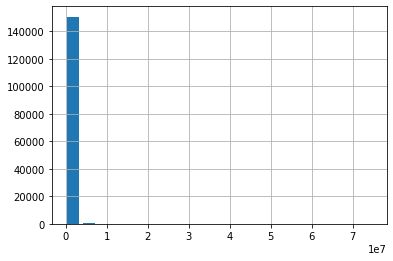

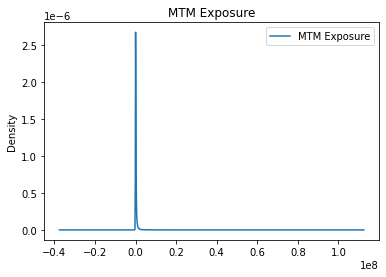

In [10]:
fcc_dev["MTM Exposure"].hist(bins=20, rwidth=0.8)
fcc_dev[["MTM Exposure"]].plot.kde()
plt.title("MTM Exposure")
plt.show()

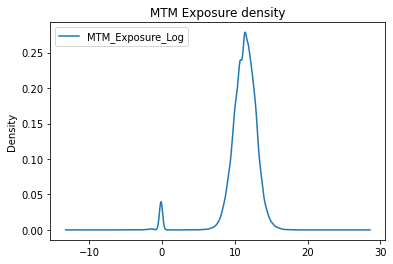

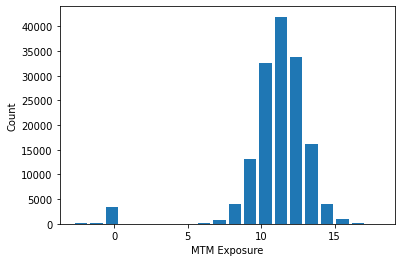

In [11]:
fcc_dev['MTM_Exposure_Log']=np.log(fcc_dev["MTM Exposure"])
fcc_dev[["MTM_Exposure_Log"]][np.isfinite(fcc_dev["MTM_Exposure_Log"])].dropna().plot.kde()
plt.title("MTM Exposure density")
plt.show()

plt.hist(fcc_dev['MTM_Exposure_Log'], bins=20, rwidth=0.8)
plt.xlabel('MTM Exposure')
plt.ylabel('Count')
plt.show()

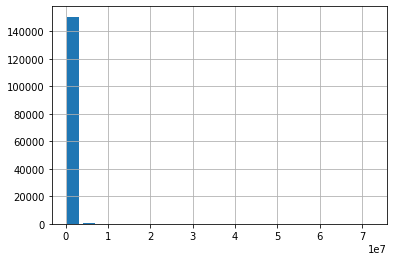

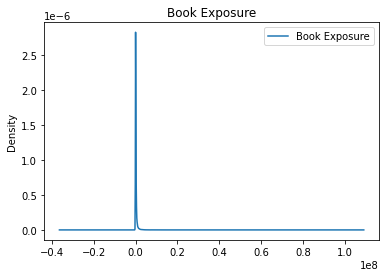

In [12]:
fcc_dev["Book Exposure"].hist(bins=20, rwidth=0.8)
fcc_dev[["Book Exposure"]].plot.kde()
plt.title("Book Exposure")
plt.show()

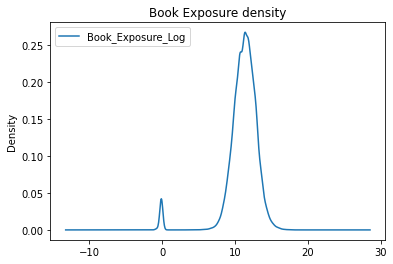

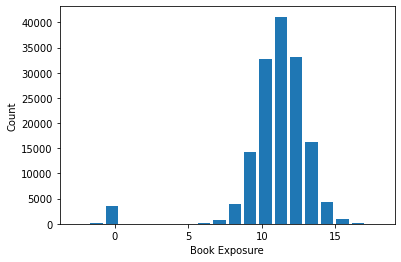

In [13]:
import numpy as np
fcc_dev['Book_Exposure_Log']=np.log(fcc_dev["Book Exposure"])
fcc_dev[["Book_Exposure_Log"]][np.isfinite(fcc_dev["Book_Exposure_Log"])].dropna().plot.kde()
plt.title("Book Exposure density")
plt.show()

plt.hist(fcc_dev['Book_Exposure_Log'], bins=20, rwidth=0.8)
plt.xlabel('Book Exposure')
plt.ylabel('Count')
plt.show()

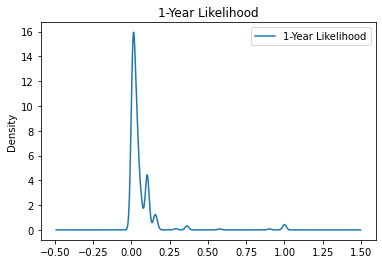

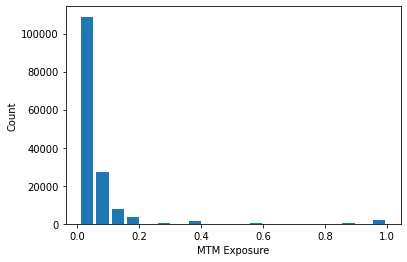

In [14]:
fcc_dev[["1-Year Likelihood"]].plot.kde()
plt.title("1-Year Likelihood")
plt.show()

plt.hist(fcc_dev['1-Year Likelihood'], bins=20, rwidth=0.8)
plt.xlabel('MTM Exposure')
plt.ylabel('Count')
plt.show()

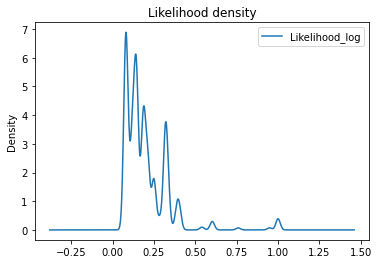

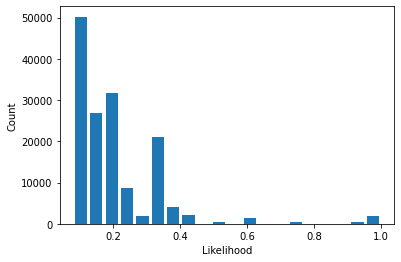

In [15]:
fcc_dev['Likelihood_log']=np.sqrt(fcc_dev["1-Year Likelihood"])
fcc_dev[["Likelihood_log"]][np.isfinite(fcc_dev["Likelihood_log"])].dropna().plot.kde()
plt.title("Likelihood density")
plt.show()

plt.hist(fcc_dev['Likelihood_log'], bins=20, rwidth=0.8)
plt.xlabel('Likelihood')
plt.ylabel('Count')
plt.show()

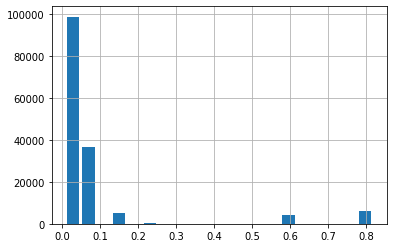

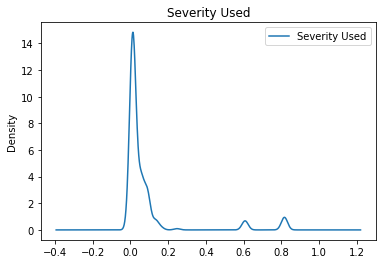

In [16]:
fcc_dev["Severity Used"].hist(bins=20, rwidth=0.8)
fcc_dev[["Severity Used"]].plot.kde()
plt.title("Severity Used")
plt.show()

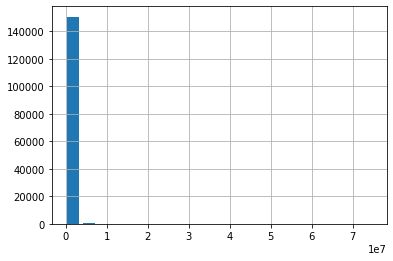

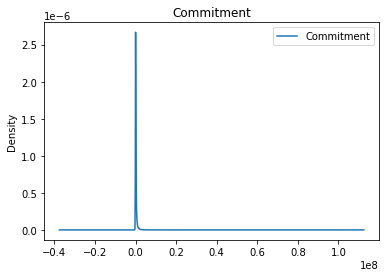

In [17]:
fcc_dev["Commitment"].hist(bins=20, rwidth=0.8)
fcc_dev[["Commitment"]].plot.kde()
plt.title("Commitment")
plt.show()

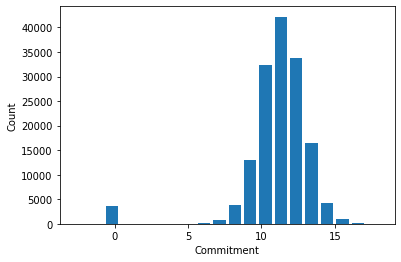

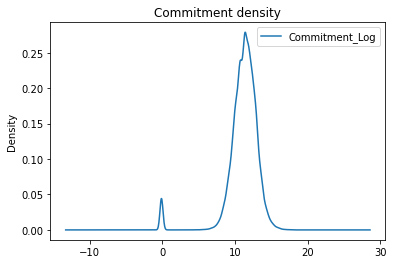

In [18]:
fcc_dev['Commitment_Log']= np.log(fcc_dev["Commitment"])
plt.hist(fcc_dev['Commitment_Log'], bins=20, rwidth=0.8)
plt.xlabel('Commitment')
plt.ylabel('Count')
plt.show()

fcc_dev[["Commitment_Log"]][np.isfinite(fcc_dev["Commitment_Log"])].dropna().plot.kde()
plt.title("Commitment density")
plt.show()

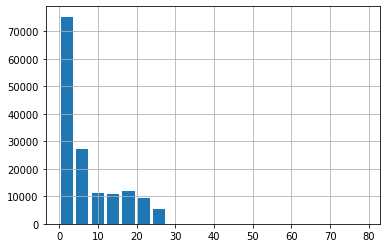

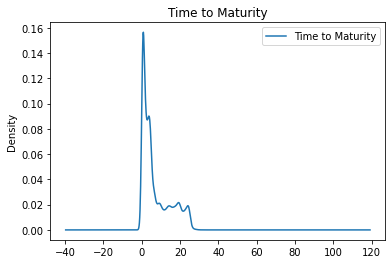

In [19]:
fcc_dev["Time to Maturity"].hist(bins=20, rwidth=0.8)
fcc_dev[["Time to Maturity"]].plot.kde()
plt.title("Time to Maturity")
plt.show()

### Box Plot for each numeric input columns

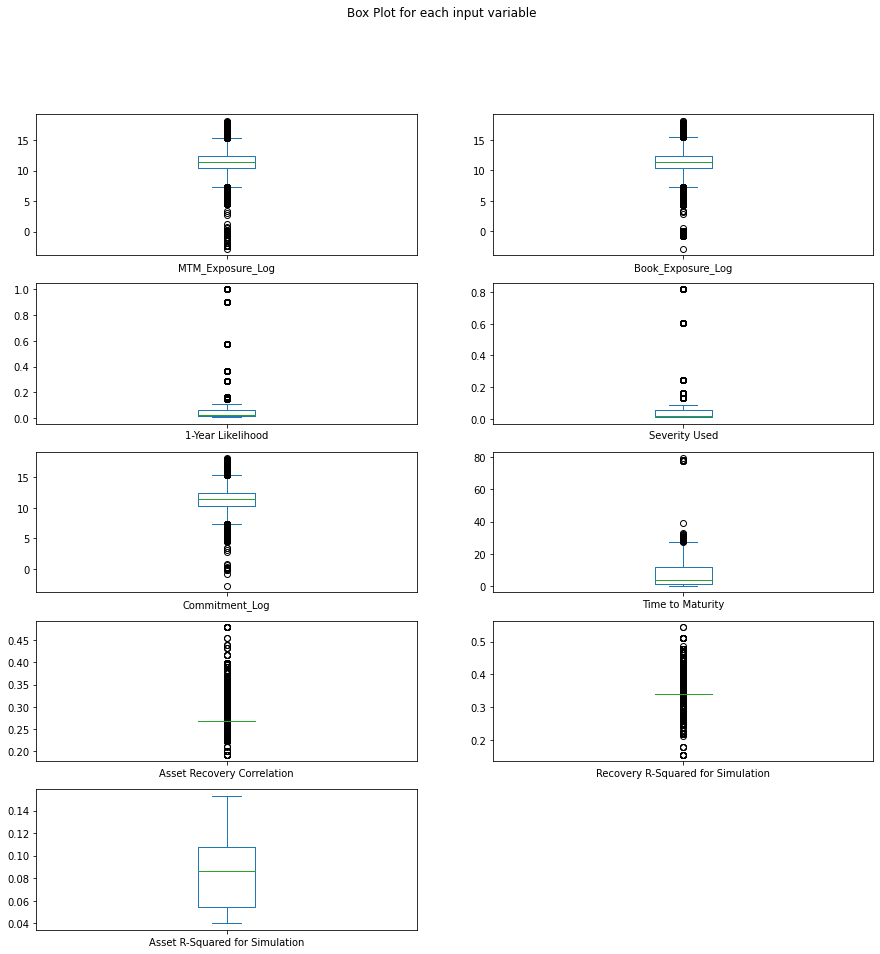

In [20]:
fcc_dev[['MTM_Exposure_Log', 'Book_Exposure_Log', '1-Year Likelihood', 'Severity Used', 'Commitment_Log', 'Time to Maturity', 'Asset Recovery Correlation', 'Recovery R-Squared for Simulation',
       'Asset R-Squared for Simulation']].plot(kind='box', subplots=True, layout = (5,2), sharex=False, sharey=False, figsize=(15,15), 
                                        title='Box Plot for each input variable')
plt.savefig('fcc_dev_box')
plt.show()

### Scatter Plot for each numeric columns

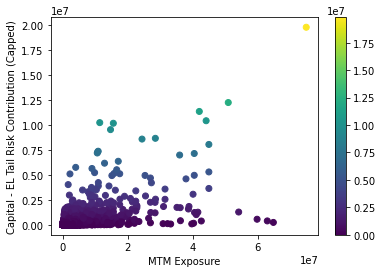

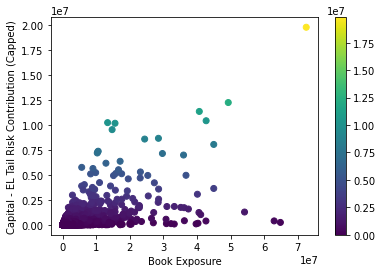

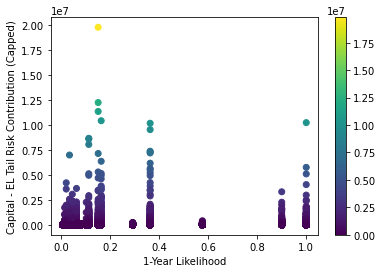

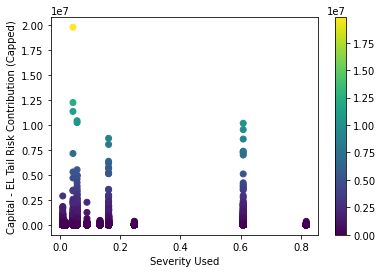

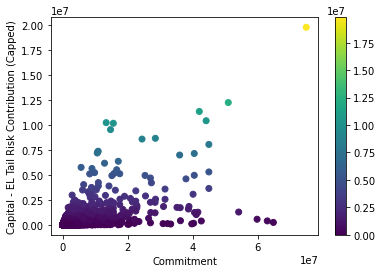

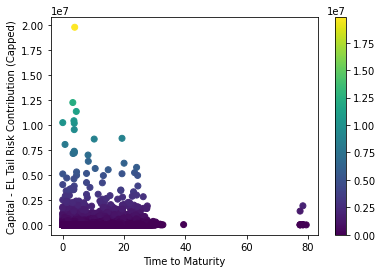

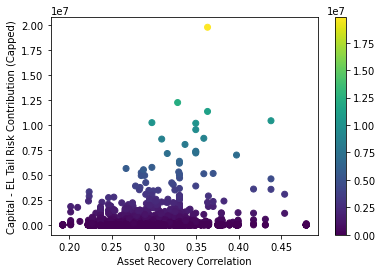

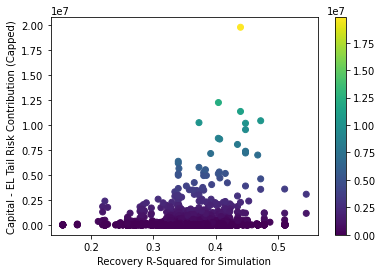

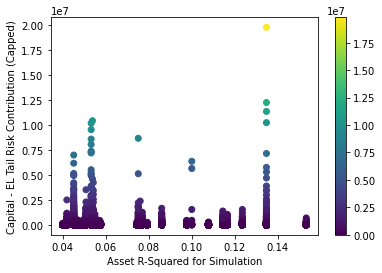

In [21]:
from pandas.plotting import scatter_matrix

columns = ['MTM Exposure', 'Book Exposure', '1-Year Likelihood', 'Severity Used', 'Commitment', 'Time to Maturity', 'Asset Recovery Correlation', 'Recovery R-Squared for Simulation',
       'Asset R-Squared for Simulation']

for i in columns:
    x = fcc_dev[i]
    y = fcc_dev['Capital - EL Tail Risk Contribution (Capped)']
    plt.scatter( x, y, c=y, cmap='viridis')
    plt.colorbar()
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()


## Removing outliers from dataframe

In [22]:
cols = ['MTM Exposure', '1-Year Likelihood', 'Severity Used', 'Commitment', 'Time to Maturity', 'Asset Recovery Correlation']

Q1 = fcc_dev[cols].quantile(0.25)
Q3 = fcc_dev[cols].quantile(0.75)
IQR = Q3 - Q1

fcc_dev = fcc_dev[~((fcc_dev[cols] < (Q1 - 1.5 * IQR)) |(fcc_dev[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Model Implementation 

### Split the dataframe into train and test and performing standardization on each columns required for model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# dropping not required columns
X = fcc_dev.drop(columns = ['Capital - EL Tail Risk Contribution (Capped)', 'MTM_Exposure_Log', 'Book Exposure', 'Book_Exposure_Log',
'Commitment_Log', 'Likelihood_log', 'Asset R-Squared for Simulation', 'Recovery R-Squared for Simulation'])
y = fcc_dev[['Capital - EL Tail Risk Contribution (Capped)']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

for i in ['MTM Exposure', '1-Year Likelihood', 'Severity Used', 'Commitment', 'Time to Maturity', 'Asset Recovery Correlation']:
# fit on training data column
    scale = StandardScaler().fit(X_train[[i]])
# transform the training data column
    X_train[i] = scale.transform(X_train[[i]])
# transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

### Creating Linear Regression model and fitting training data into it

In [24]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predict the target value and evaluation of model

In [25]:
y_predict = regressor.predict(X_test)
r2_score = regressor.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_predict)
print("R2 Score : ", r2_score)
print("Mean Absolute Error : ", mae)

R2 Score :  0.6550390795712231
Mean Absolute Error :  2302.962795028063


## Lasso Regression Model (L1 Regression)

In [26]:
lasso_reg = linear_model.Lasso(normalize=True, tol=1e-2)
lasso_reg.fit(X_train, y_train)

Lasso(normalize=True, tol=0.01)

In [27]:
y_pred_lasso = lasso_reg.predict(X_test)
lasso_r2_score = lasso_reg.score(X_test, y_test)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
print("R2 Score : ", lasso_r2_score)
print("Mean Absolute Error : ", lasso_mae)

R2 Score :  0.6420424872180399
Mean Absolute Error :  2189.942692125653


## Ridge Regression Model (L2 Regression)

In [28]:
ridge_reg = linear_model.Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [29]:
y_pred_ridge = ridge_reg.predict(X_test)
ridge_r2_score = ridge_reg.score(X_test, y_test)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
print("R2 Score : ", ridge_r2_score)
print("Mean Absolute Error : ", ridge_mae)

R2 Score :  0.6549413356690403
Mean Absolute Error :  2302.8870924793932


## Exporting the result of Target columns of development and Test Dataset

In [30]:
fcc_dev_data = pd.read_csv('Development Dataset - With Actuals.csv')
fcc_test_data = pd.read_csv('Holdout Test - Actuals Removed.csv')

In [31]:
# Find total null columns in development and test dataset

print("NULL values in Development Dataset\n")
print(fcc_dev_data.isna().sum())
print("\nNULL values in Test Dataset\n")
print(fcc_test_data.isna().sum())

NULL values in Development Dataset

Instrument                                          0
Instrument Type                                     0
Instrument Subtype                                 32
Counterparty Alias                                  0
MTM Exposure                                        0
Book Exposure                                       0
1-Year Likelihood                                   0
Severity Used                                       0
Industry Alias                                      0
Commitment                                          0
Country of Incorporation                            0
Maturity Date                                       0
Time to Maturity                                    0
Capital - EL Tail Risk Contribution (Capped)        0
Capitalization Rate - EL Tail Risk Contribution     0
Asset Recovery Correlation                          0
Recovery R-Squared for Simulation                   0
Asset R-Squared for Simulation                

In [32]:
# Drop the null values from datasets

fcc_dev_data.dropna(subset=['Instrument Subtype'], inplace = True)
fcc_dev_df = fcc_dev_data
fcc_test_data.dropna(subset=['Instrument Subtype'], inplace = True)
fcc_test_df = fcc_test_data

In [33]:
cols_to_use = ['Instrument Subtype', 'MTM Exposure', '1-Year Likelihood', 'Severity Used',
       'Commitment', 'Time to Maturity', 'Capital - EL Tail Risk Contribution (Capped)', 'Asset Recovery Correlation']

fcc_dev_df = fcc_dev_df[cols_to_use]
fcc_test_df = fcc_test_df[cols_to_use]

In [34]:
print("Shape of Development Dataframe after dropping null values : ", fcc_dev_df.shape)
print("Shape of Test Dataframe after dropping null values : ", fcc_test_df.shape)

Shape of Development Dataframe after dropping null values :  (151500, 8)
Shape of Test Dataframe after dropping null values :  (14997, 8)


In [35]:
# One-Hot encoding in both the dataset

dummy_dev_df = pd.get_dummies(fcc_dev_df['Instrument Subtype'])
fcc_dev_df = pd.concat([fcc_dev_df, dummy_dev_df], axis = 1)
fcc_dev_df = fcc_dev_df.drop(columns = ['Instrument Subtype'])

dummy_test_df = pd.get_dummies(fcc_test_df['Instrument Subtype'])
fcc_test_df = pd.concat([fcc_test_df, dummy_test_df], axis = 1)
fcc_test_df = fcc_test_df.drop(columns = ['Instrument Subtype'])

In [36]:
fcc_dev_df = fcc_dev_df.drop(columns = ['Capital - EL Tail Risk Contribution (Capped)'])
fcc_test_df = fcc_test_df.drop(columns = ['Capital - EL Tail Risk Contribution (Capped)'])

## Exporting dataframe with predicted columns with Ridge regression into csv file

In [37]:
predict_ridge_dev_data = ridge_reg.predict(fcc_dev_df)
fcc_dev_data['Capital - EL Tail Risk Contribution (Capped) - Predicted'] = predict_ridge_dev_data
fcc_dev_data['Capitalization Rate - EL Tail Risk Contribution - Predicted'] = predict_ridge_dev_data / fcc_dev_data[['MTM Exposure']]
fcc_dev_data.to_csv('Dev_LinearRegression_Ridge.csv')

In [38]:
predict_ridge_test_data = ridge_reg.predict(fcc_test_df)
fcc_test_data['Capital - EL Tail Risk Contribution (Capped)'] = predict_ridge_test_data
fcc_test_data['Capitalization Rate - EL Tail Risk Contribution'] = predict_ridge_test_data / fcc_test_data[['MTM Exposure']]
fcc_test_data.to_csv('Test_LinearRegression_Ridge.csv')

## Exporting dataframe with predicted columns with Lasso regression into csv file

In [39]:
predict_lasso_dev_data = lasso_reg.predict(fcc_dev_df)
fcc_dev_data['Capital - EL Tail Risk Contribution (Capped) - Predicted'] = predict_ridge_dev_data

fcc_dev_data['Capitalization Rate - EL Tail Risk Contribution - Predicted'] = predict_ridge_dev_data / fcc_dev_data[['MTM Exposure']]
fcc_dev_data.to_csv('Dev_LinearRegression_Lasso.csv')

In [40]:
predict_lasso_test_data = lasso_reg.predict(fcc_test_df)
fcc_test_data['Capital - EL Tail Risk Contribution (Capped)'] = predict_lasso_test_data
predict_lasso_test_data=predict_lasso_test_data.reshape(fcc_test_df.shape[0],1)

fcc_test_data['Capitalization Rate - EL Tail Risk Contribution'] = predict_lasso_test_data / fcc_test_data[['MTM Exposure']]
fcc_test_data.to_csv('Test_LinearRegression_Lasso.csv')